In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [33]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plotBoundary(model, X, y, title):
    fig, ax = plt.subplots()
    xx, yy = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 2e-2), 
                         np.arange(X[:,1].min()-1, X[:,1].max()+1, 2e-2))
    plot_contours(ax,model,xx,yy,cmap=plt.cm.gist_earth)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.flag, s=40, edgecolors='c')
    plt.title(title)
    plt.grid()
    plt.show()

## Linear

In [34]:
# x = np.array([[-1,0],[0,1],[0,-1],[1,0],[3,-1],[3,1],[6,-1],[6,1]])
x = np.array([[1,4],[2,3],[4,5],[5,6]])
# x = np.array([[-1,0],[1,0],[2,-2]])
# x = np.array([[2,0],[3,0],[0,4],[0,6]])
# x = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )

In [35]:
# y = np.array([-1,-1, -1, 1, 1 , 1 ])


# y = np.array([1,1,1,1,2,2,2,2])
y = np.array([1,1,2,2])
# y = np.array([1,2,1])
# y = np.array([1,1,2,2])
# y = np.array([1,1,1,2,2,2])

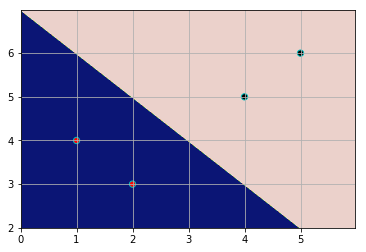

In [36]:
clf = SVC(kernel='linear')
clf.fit(x,y)

plotBoundary(clf, x, y, "")

#### weights

In [6]:
clf.coef_

array([[0.5, 0.5]])

#### bias

In [7]:
clf.intercept_

array([-3.5])

#### support vectors

In [8]:
clf.support_vectors_

array([[2., 3.],
       [4., 5.]])

#### support vectors indices

In [9]:
clf.support_

array([1, 2])

#### Lagrange's multipliers-alphas

In [10]:
clf.dual_coef_

array([[-0.25,  0.25]])

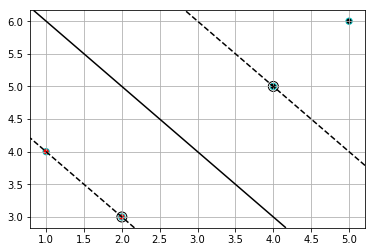

In [67]:
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.flag, s=40, edgecolors='c')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
# ax.contourf(XX, YY, Z,cmap=plt.cm.gist_earth)

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.grid()
plt.show()